## Installation des packages

In [6]:
import os
from IPython.display import Image, display, clear_output
import numpy as np
#pour colorer la grille, ne marche pas sur jupyter notebook!
from colorama import Fore, Style
#https://pypi.org/project/colorama/

## Initialisation du plateau et création du jeu

In [7]:
def play():
    #Initialisation du plateau 
    plato = np.zeros((6,7))
    j1 = 1
    j2 = 2

    resultat = 0 #0 = le jeu n'est pas terminé

    #Tant qu'il n'y a pas de vainqueur, on joue !
    while True:
        # Pour que ce soit un peu plus clair, on change le plateau de couleur quand c'est à tel
        # ou tel joueur de jouer.
        if (plato == 1).sum() <= (plato == 2).sum():
            j = j1
            print(Fore.RED + 'C\'est au tour du joueur Rouge')
        else:
            j = j2
            print(Fore.YELLOW + 'C\'est au tour du joueur Jaune')

        #On demande au joueur d'entrer un numéro de colonne entre 1 et 7
        while True:
            try:
                x = int(input('à vous de jouer (entre 1 et 7): ').strip()) - 1
                if x in range(7) and plato[0, int(x)] == 0: 
                    break
                else:
                    print("Veuillez entrer un numéro entre 1 et 7.")
            except ValueError: 
                print("Ce n'est pas un nombre. Essayez encore.")

        for i in np.r_[:6]:
            i = 5 - i #on retourne le tableau, les jetons tombent en bas !
            if plato[int(i), int(x)] == 0:
                plato[i,int(x)] = j
                if j == 1:
                    print(Fore.RED + str(plato))
                else:
                    print(Fore.YELLOW + str(plato))
                break
        else:
            print("La colonne est pleine. Essayez une autre colonne.")
            continue

        # vérification des victoires
        #victoire en lignes
        for r in np.r_[:6]:    
            for d in  np.r_[:4]:
                f = d + 4
                s = np.prod(plato[r, d:f])
                if s == 1**4 or s == 2**4:
                    resultat  = 1
                    
        #victoire en colonnes
        for c in np.r_[:7]:    
            for d in  np.r_[:3]:
                f = d + 4
                s = np.prod(plato[d:f, c])
                if s == 1**4 or s == 2**4:
                    resultat  = 1

        #victoire en colonnes
        for r in np.r_[:3]:    
            for c in  np.r_[:4]:
                s = 1
                for i in np.r_[:4]:
                    p = plato[r+i, c+i]
                    s *= p
                if s == 1**4 or s == 2**4:
                    resultat  = 1     

        #victoire en diag
        for r in np.r_[3:6]:    
            for c in  np.r_[3:7]:
                s = 1
                for i in np.r_[:4]:
                    p = plato[r-i, c-i]
                    s *= p
                if s == 1**4 or s == 2**4:
                    resultat  = 1

        #Si le résultat est égal à 1, le jeu est terminé !
        if resultat  == 1:
            if j == 1: #joueur 1 qui gagne
                print(Fore.RED + f'Le joueur Rouge a gagné!')
                display(Image(filename='rouge.png'))
            else: #sinon joueur 2 qui gagne
                print(Fore.YELLOW + f'Le joueur Jaune a gagné!')
                display(Image(filename='jaune.png'))
            break

        #sinon vérifie si tout le plateau est rempli
        elif np.all(plato != 0): 
            print("Egalité, voulez-vous recommencer?")
            break

C'est au tour du joueur Rouge
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
C'est au tour du joueur Jaune
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0.]]
C'est au tour du joueur Rouge
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 1. 0. 0. 0. 0.]]
C'est au tour du joueur Jaune
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 1. 2. 0. 0. 0.]]
C'est au tour du joueur Rouge
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 1. 2. 1. 0. 0.]]
C'est au tour du joueur Jaune
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]

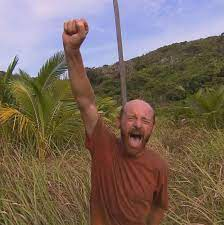

In [8]:
play()